<a href="https://colab.research.google.com/github/jadhavprajakta468/Defaulter_Prediction/blob/main/Copy_of_Defaulter_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy import stats
import matplotlib.pyplot as plt


Load the database

K-NN algorithm It giving wrong output

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML datasets/DefaulterList - Sheet1 (1).csv")

# Encode the target variable
le = LabelEncoder()
df['Defaulter'] = le.fit_transform(df['Defaulter'])
print("Columns in the DataFrame:")
print(df.columns)
# Selecting only the specified columns for features
selected_columns = ['IoT', 'SE', 'HS-OB', 'OE1- SC', 'OEI-ICCF', 'IOTL']
X = df[selected_columns]
# Target variable
y = df['Defaulter']

Columns in the DataFrame:
Index(['CNumber', 'Name of the Student', 'IoT', 'SE', 'HS-OB', 'OE1- SC',
       'OEI-ICCF', 'IOTL', 'Defaulter(IoT)', 'Defaulter(SE)',
       'Defaulter(HS-OB)', 'Defaulter(OE1- SC)', 'Defaulter(OEI-ICCF)',
       'Defaulter(IOTL)', 'Defaulter'],
      dtype='object')


Training and Testing

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Missing values in X_test:", X_test.isnull().sum())

Missing values in X_test: IoT         0
SE          0
HS-OB       0
OE1- SC     0
OEI-ICCF    0
IOTL        0
dtype: int64


Remove the outliers

In [ ]:
outlier_indices = []
for column in selected_columns:
    outlier_index = df[df[column] > 30].index
    outlier_indices.extend(outlier_index)
    if len(outlier_index) > 0:
        print("Outliers for", column, ":")
        for idx in outlier_index:
            print("CNumber:", df.at[idx, 'CNumber'], ", Name:", df.at[idx, 'Name of the Student'], ", Subject:", column, ", Value:", df.at[idx, column])

# Remove outliers from the dataset
df.drop(outlier_indices, inplace=True)


Outliers for IoT :
CNumber: C22018221430 , Name: AGARWAL MUSKAN , Subject: IoT , Value: 100
CNumber: C22018221431 , Name: JOSHI ADITI ANANT , Subject: IoT , Value: 100


Implementing Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.50      1.00      0.67         1

    accuracy                           0.96        24
   macro avg       0.75      0.98      0.82        24
weighted avg       0.98      0.96      0.96        24



Conusion Matrix

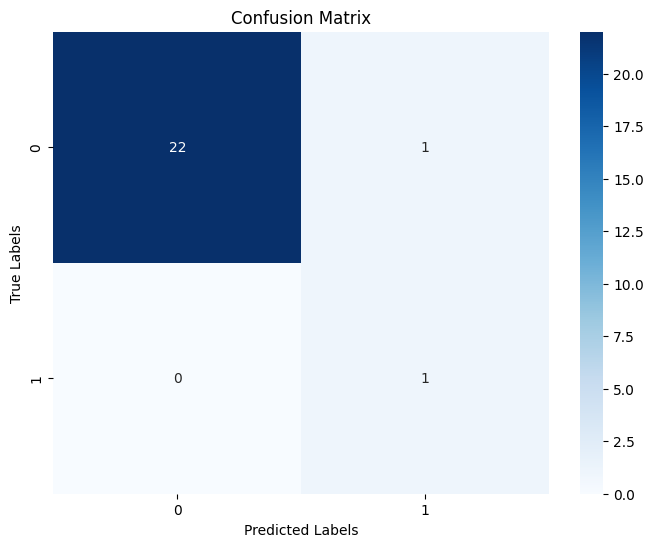

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Pie chart

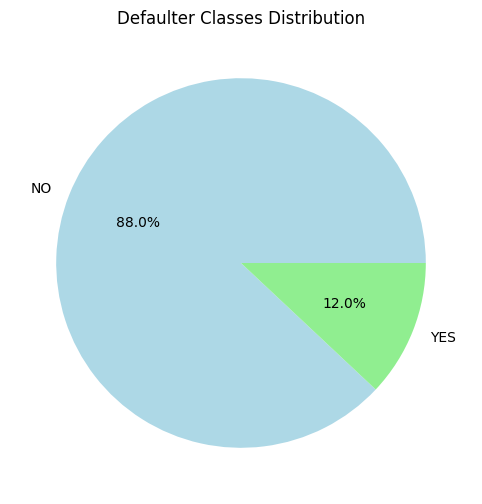

In [ ]:
# Map the label values to 'YES' and 'NO'
df['Defaulter'] = df['Defaulter'].map({1: 'YES', 0: 'NO'})

# Count the occurrences of each label in the target variable
label_counts = df['Defaulter'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Defaulter Classes Distribution')
plt.show()

Side-by-side chart

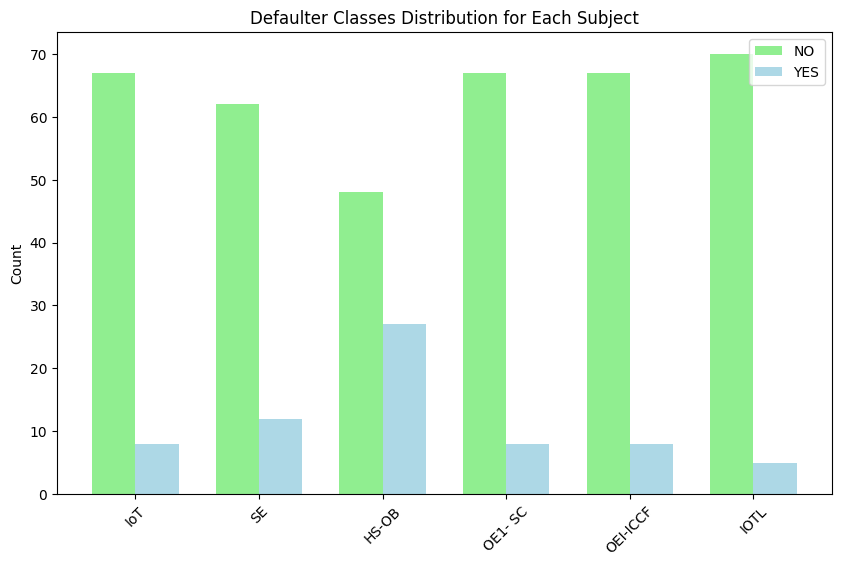

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of "YES" and "NO" for each subject column
defaulter_counts = {}
subjects = ['IoT', 'SE', 'HS-OB', 'OE1- SC', 'OEI-ICCF', 'IOTL']

for subject in subjects:
    counts = df['Defaulter(' + subject + ')'].value_counts()
    defaulter_counts[subject] = counts

# Extract counts for YES and NO
yes_counts = [defaulter_counts[subject].get('YES', 0) for subject in subjects]
no_counts = [defaulter_counts[subject].get('NO', 0) for subject in subjects]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Bar positions
bar_positions = range(len(subjects))

# Plotting "NO" counts
ax.bar([pos - bar_width/2 for pos in bar_positions], no_counts, bar_width, label='NO', color='lightgreen')

# Plotting "YES" counts
ax.bar([pos + bar_width/2 for pos in bar_positions], yes_counts, bar_width, label='YES', color='lightblue')

# Adding labels and title
ax.set_ylabel('Count')
ax.set_title('Defaulter Classes Distribution for Each Subject')
ax.set_xticks(bar_positions)
ax.set_xticklabels(subjects)
ax.legend()

plt.xticks(rotation=45)
plt.show()


Testing

In [ ]:
#USER INPUT TESTING
student_attendance = {
    'IoT': 1,
    'SE': 1,
    'HS-OB':10,
    'OE1- SC': 12,
    'OEI-ICCF': 0,
    'IOTL': 0
}

# Convert the student's attendance into DataFrame
student_df = pd.DataFrame([student_attendance])

# Predict whether the student is a defaulter or not using Random Forest classifier
defaulter_prediction = rf_classifier.predict(student_df)
defaulter_prediction_label = le.inverse_transform(defaulter_prediction)
print("Predicted Defaulter Label:", defaulter_prediction_label[0])



Predicted Defaulter Label: YES


Predict Defaulter for next month data

In [ ]:


# Load the dataset
df1 = pd.read_csv("/content/Defaulter_NextMonth.csv")

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder on the target variable 'Defaulter'
le.fit(df1['Defaulter'])

# Selecting only the specified columns for features
selected_columns = ['IoT', 'SE', 'HS-OB', 'OE1- SC', 'OEI-ICCF', 'IOTL']
X1 = df1[selected_columns]

# Predict using the Random Forest classifier
y_pred = rf_classifier.predict(X1)

# Map predictions to 'Yes' and 'No' labels
y_pred_labels = ['YES' if label == 1 else 'NO' for label in y_pred]

# Assign predicted labels to the 'Defaulter' column
df1['Defaulter'] = y_pred_labels

# Save the DataFrame back to the CSV file
df1.to_csv("/content/Defaulter_NextMonth.csv", index=False)
print(df1["Defaulter"])



0      NO
1      NO
2      NO
3      NO
4      NO
     ... 
72     NO
73     NO
74     NO
75    YES
76     NO
Name: Defaulter, Length: 77, dtype: object


Logistic regression is also giving wrong output

In [ ]:
from sklearn.linear_model import LogisticRegression

# Load the dataset
df2 = pd.read_csv("/content/drive/MyDrive/ML datasets/DefaulterList - Sheet1 (1).csv")

# Encode the target variable
le = LabelEncoder()
df2['Defaulter'] = le.fit_transform(df2['Defaulter'])

# Selecting only the specified columns for features
selected_columns = ['IoT', 'SE', 'HS-OB', 'OE1- SC', 'OEI-ICCF', 'IOTL']
X = df2[selected_columns]
y = df2['Defaulter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier
logistic_regression.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = logistic_regression.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Define the student's attendance data for prediction
student_attendance = {
    'IoT': 10,
    'SE': 10,
    'HS-OB': 10,
    'OE1- SC': 12,
    'OEI-ICCF': 0,
    'IOTL': 0
}

# Convert the student's attendance into DataFrame
student_df = pd.DataFrame([student_attendance])

# Predict whether the student is a defaulter or not using Logistic Regression classifier
defaulter_prediction = logistic_regression.predict(student_df)

# Convert the predicted label back to the original label
defaulter_prediction_label = le.inverse_transform(defaulter_prediction)

print("Predicted Defaulter Label:", defaulter_prediction_label[0])



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.00      0.00      0.00         0

    accuracy                           0.88        16
   macro avg       0.50      0.44      0.47        16
weighted avg       1.00      0.88      0.93        16

Predicted Defaulter Label: YES


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implementing the KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

